# Convection Severity Visualization

This notebook visualizes convection severity data on a map focused on Western Europe using Cartopy.


In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from matplotlib.colors import ListedColormap, BoundaryNorm


## Configuration

Set the path to your convection_severity.nc file:


In [13]:
# Path to the convection severity file
# You can modify this path to point to any convection_severity.nc file
file_path = Path("../data/wx/severity/convection_severity.nc")

# Verify the file exists
if not file_path.exists():
    raise FileNotFoundError(f"File not found: {file_path}")

print(f"Loading data from: {file_path}")


Loading data from: ../data/wx/severity/convection_severity.nc


## Load Data


In [14]:
# Open the netCDF file
ds = xr.open_dataset(file_path)

# Display dataset information
print("Dataset structure:")
print(ds)
print("\nSeverity categories:")
print("0 = None, 1 = Low, 2 = Moderate, 3 = High")


Dataset structure:
<xarray.Dataset> Size: 279MB
Dimensions:      (valid_time: 144, latitude: 201, longitude: 321)
Coordinates:
  * valid_time   (valid_time) datetime64[ns] 1kB 2023-07-17 ... 2023-08-05T23...
  * latitude     (latitude) float64 2kB 75.0 74.75 74.5 ... 25.5 25.25 25.0
  * longitude    (longitude) float64 3kB -20.0 -19.75 -19.5 ... 59.5 59.75 60.0
    number       int64 8B ...
    expver       (valid_time) <U4 2kB ...
Data variables:
    severity     (valid_time, latitude, longitude) int8 9MB ...
    cb_present   (valid_time, latitude, longitude) int8 9MB ...
    precip_rate  (valid_time, latitude, longitude) float32 37MB ...
    cp_proxy     (valid_time, latitude, longitude) float32 37MB ...
    bs06         (valid_time, latitude, longitude) float32 37MB ...
    omega500     (valid_time, latitude, longitude) float32 37MB ...
    tcwv         (valid_time, latitude, longitude) float32 37MB ...
    cape         (valid_time, latitude, longitude) float32 37MB ...
    cin_mag 

## Define Western Europe Extent

Western Europe region bounds (approximately):
- Longitude: -10°E to 15°E
- Latitude: 35°N to 60°N


In [15]:
# Western Europe extent [lon_min, lon_max, lat_min, lat_max]
western_europe_extent = [-20, 60, 20, 60]


## Visualize Severity for a Specific Time


In [16]:
# Select a time index (you can change this to view different times)
time_idx = 0

# Extract the severity data for the selected time
severity = ds['severity'].isel(valid_time=time_idx)
valid_time = ds['valid_time'].isel(valid_time=time_idx).values

# Convert timestamp to readable format
time_str = pd.Timestamp(valid_time).strftime('%Y-%m-%d %H:%M UTC')

print(f"Plotting severity for: {time_str}")


Plotting severity for: 2023-07-17 00:00 UTC


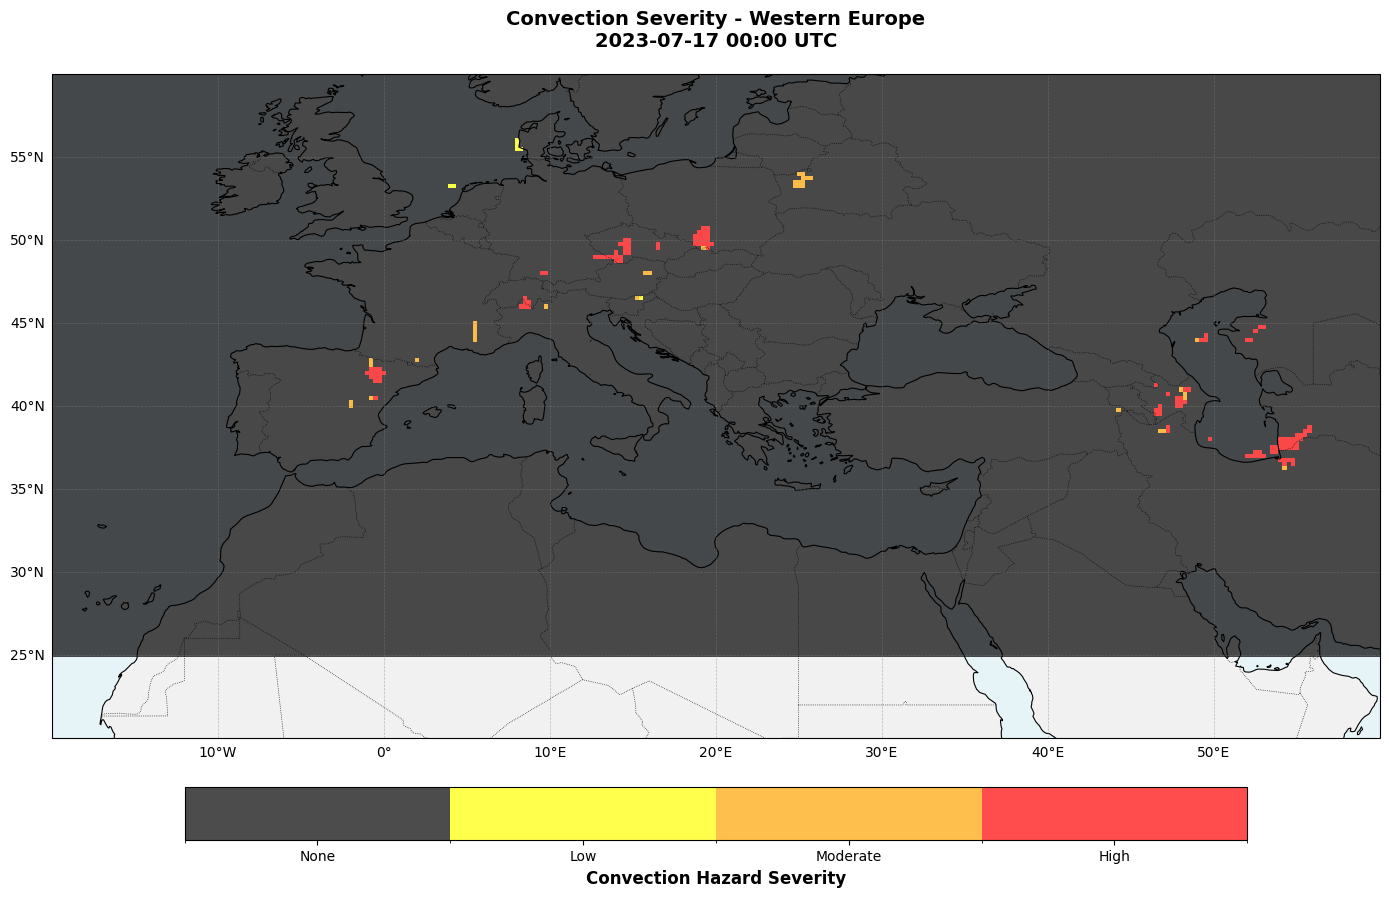

In [17]:
# Create the figure and axis with Cartopy projection
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to Western Europe
ax.set_extent(western_europe_extent, crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Define colors for severity levels
# 0=None (transparent), 1=Low (yellow), 2=Moderate (orange), 3=High (red)
colors = ['#00000000', '#FFFF00', '#FFA500', '#FF0000']
cmap = ListedColormap(colors)
bounds = [0, 1, 2, 3, 4]
norm = BoundaryNorm(bounds, cmap.N)

# Plot the severity data
im = ax.pcolormesh(
    ds['longitude'],
    ds['latitude'],
    severity,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    norm=norm,
    alpha=0.7
)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('Convection Hazard Severity', fontsize=12, fontweight='bold')
cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
cbar.set_ticklabels(['None', 'Low', 'Moderate', 'High'])

# Add title
plt.title(f'Convection Severity - Western Europe\n{time_str}', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


## Browse Through Multiple Time Steps

Use the function below to easily plot different time steps:


In [18]:
def plot_severity(time_idx, extent=western_europe_extent):
    """
    Plot convection severity for a specific time index.
    
    Parameters:
    -----------
    time_idx : int
        Index of the time step to plot
    extent : list
        Map extent [lon_min, lon_max, lat_min, lat_max]
    """
    # Extract data
    severity = ds['severity'].isel(valid_time=time_idx)
    valid_time = ds['valid_time'].isel(valid_time=time_idx).values
    time_str = pd.Timestamp(valid_time).strftime('%Y-%m-%d %H:%M UTC')
    
    # Create figure
    fig = plt.figure(figsize=(14, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Set extent
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    # Add features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    
    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    # Colors and normalization
    colors = ['#00000000', '#FFFF00', '#FFA500', '#FF0000']
    cmap = ListedColormap(colors)
    bounds = [0, 1, 2, 3, 4]
    norm = BoundaryNorm(bounds, cmap.N)
    
    # Plot
    im = ax.pcolormesh(
        ds['longitude'],
        ds['latitude'],
        severity,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        norm=norm,
        alpha=0.7
    )
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
    cbar.set_label('Convection Hazard Severity', fontsize=12, fontweight='bold')
    cbar.set_ticks([0.5, 1.5, 2.5, 3.5])
    cbar.set_ticklabels(['None', 'Low', 'Moderate', 'High'])
    
    # Title
    plt.title(f'Convection Severity - Western Europe\n{time_str}', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

# Show available times
print(f"Total time steps available: {len(ds['valid_time'])}")
print(f"\nTime range: {pd.Timestamp(ds['valid_time'].values[0])} to {pd.Timestamp(ds['valid_time'].values[-1])}")


Total time steps available: 144

Time range: 2023-07-17 00:00:00 to 2023-08-05 23:00:00


In [19]:
# Interactive: Slider to choose time index and plot severity map
import ipywidgets as widgets
from IPython.display import display

time_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(ds['valid_time']) - 1,
    step=1,
    description='Time idx:',
    continuous_update=False
)

widgets.interact(plot_severity, time_idx=time_slider, extent=widgets.fixed(western_europe_extent))


interactive(children=(IntSlider(value=0, continuous_update=False, description='Time idx:', max=143), Output())…

<function __main__.plot_severity(time_idx, extent=[-20, 60, 20, 60])>

## Statistics Summary


In [20]:
# Calculate statistics for a specific time
time_idx = 0
severity_data = ds['severity'].isel(valid_time=time_idx).values

# Count occurrences of each severity level
unique, counts = np.unique(severity_data, return_counts=True)
severity_counts = dict(zip(unique, counts))

severity_labels = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High'}

print(f"Severity distribution for time index {time_idx}:")
print("-" * 40)
for level in [0, 1, 2, 3]:
    count = severity_counts.get(level, 0)
    percentage = (count / severity_data.size) * 100
    print(f"{severity_labels[level]:>10}: {count:>8} pixels ({percentage:>5.2f}%)")


Severity distribution for time index 0:
----------------------------------------
      None:    64350 pixels (99.73%)
       Low:        7 pixels ( 0.01%)
  Moderate:       36 pixels ( 0.06%)
      High:      128 pixels ( 0.20%)


## Additional Variables

The dataset also contains other useful variables that you can visualize:
- `cb_present`: Convective cloud presence mask
- `precip_rate`: Convective precipitation rate (mm/h)
- `cp_proxy`: CAPE-precipitation lightning proxy
- `bs06`: 0-6 km bulk shear magnitude (m/s)
- `omega500`: Vertical velocity at 500 hPa


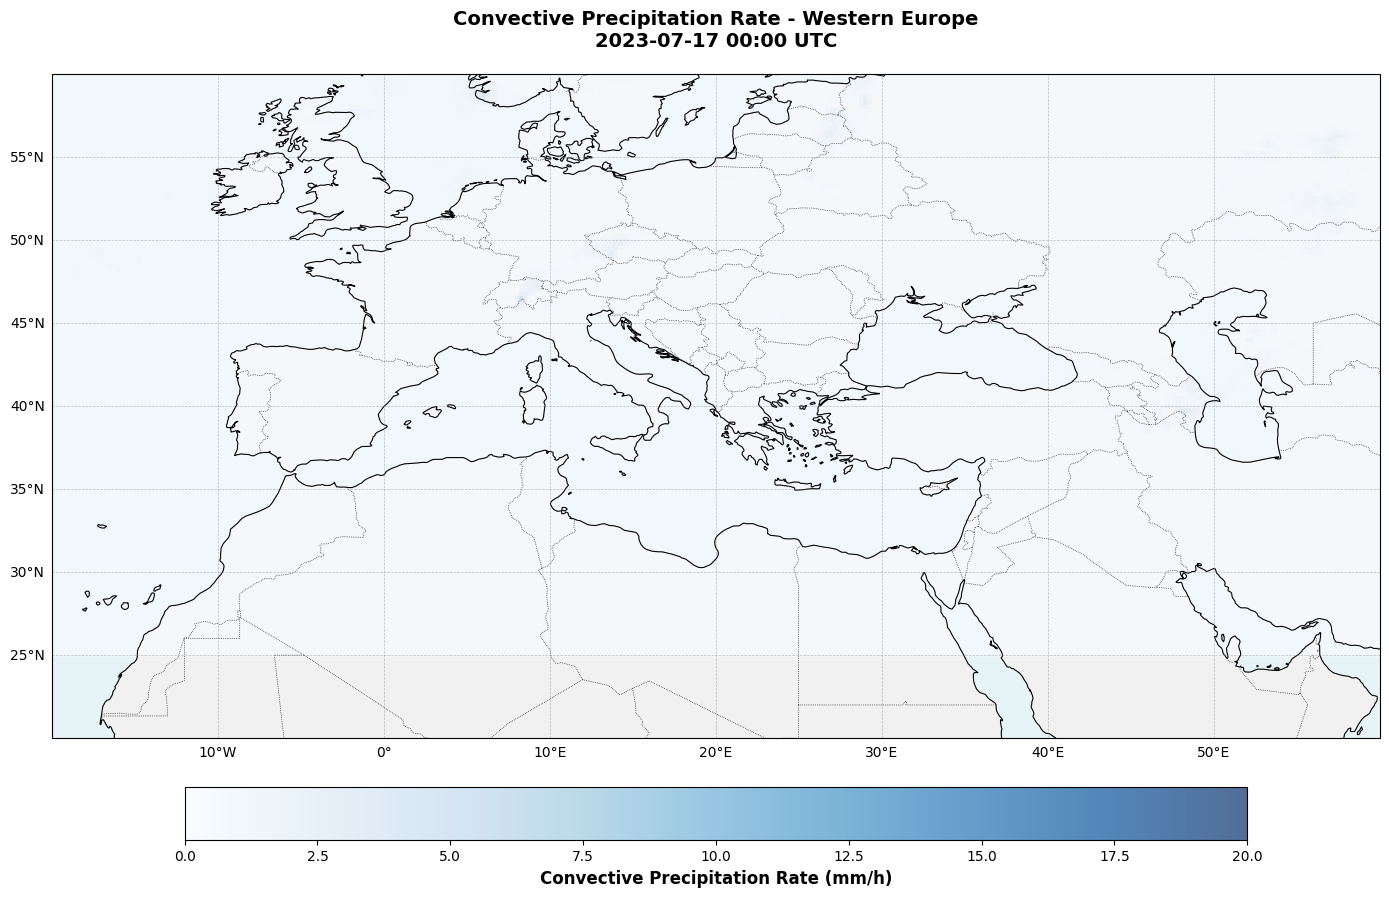

In [21]:
# Example: Plot precipitation rate
time_idx = 0
precip = ds['precip_rate'].isel(valid_time=time_idx)
valid_time = ds['valid_time'].isel(valid_time=time_idx).values
time_str = pd.Timestamp(valid_time).strftime('%Y-%m-%d %H:%M UTC')

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(western_europe_extent, crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot precipitation rate
im = ax.pcolormesh(
    ds['longitude'],
    ds['latitude'],
    precip,
    transform=ccrs.PlateCarree(),
    cmap='Blues',
    vmin=0,
    vmax=20,
    alpha=0.7
)

cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8)
cbar.set_label('Convective Precipitation Rate (mm/h)', fontsize=12, fontweight='bold')

plt.title(f'Convective Precipitation Rate - Western Europe\n{time_str}', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
